# Teach Your Laptop to Trade Stock Options.
# Notebook 3: Train Machine Learners.
What could possibly go wrong?

12/11/2020

## Purpose of this Notebook - Train Learners to trade stock options.
This notebook is the third in a series of notebooks that demonstrate how to train a Machine learner to trade stock options, successfully, we hope. This notebook shows how to train several Learners and compare them to choose the best one for your specific project. This notebook uses a data set of stock option trades for ExxonMobil (XOM) from 2017-2018 to illustrate many aspects of Machine Learning with the python SKLearn library. All the trades are short covered calls. 

What You Need: Basic knowledge of Python, pandas, numpy, dataframes, and statistics. 

What You Don't Need: Knowledge of stock options, scipy, sklearn, or Machine Learning. This project is self-contained and you will learn as you go.

You will Learn:

- How to display features for visual evaluation of feature quality.
- How to set up several Learners for comparison on your feature set.
- How to capture performance data and execution time data for comparison.
- How to display comparison data for visual inspection.


## 1. Explore the Feature Set.

Load the csv file training_features.csv into a dataframe. 

Although you do not need any knowledge of stock options, or even finance, to use this notebook, a little information may make it more interesting.

Column Name Abbreviations
- STO - 'Sell to Open.' A trader may sell or buy a put or call contract to open a trade.
- ARR - 'Annual Return Rate.' The equivalent rate of return on the trade, if it expires, on an annual basis.
- strike_delta% - The difference between the stock price and the option strike price (the delta) as a % of stock price.
- days long - The number of days from the trade date to the expiry date.
- Profit$ - the $ profit/loss for the specific trade.
- Profit% - the profit/loss for the trade measured as a percent of the stock price at the time the trade was opened.

Evaluation Questions: 
- Do think these features are sufficient to predict the profitability of this type of option trade? Why, why not?
- What other features would you add to this feature set?
- How will you evaluate feature quality and contribbution to the results?

Code Questions:
- How many features are in this feature set?
- What is the data type of each feature?
- What are the statistics of each feature? Get the min, max, mean, and standard deviation of each. Use built-in functions in Pandas.


In [1]:
import pandas as pd
import numpy as np
training_features = pd.DataFrame()
training_features = pd.read_csv('training_features_wlabel.csv', index_col = False)
print(training_features.head(5))
#print(training_features.columns.to_list())

   Unnamed: 0  stock_price_at_STO_offer  STO_strike  STO_days_long  \
0           0                     81.82        80.0           11.0   
1           1                     81.81        80.0           11.0   
2           2                     81.82        80.5           11.0   
3           3                     81.81        80.5           11.0   
4           4                     82.10        80.5           11.0   

   STO_offer_ARR  stock_price_at_open  STO_ask_fee%  STO_offer_strike_delta%  \
0       0.786760                82.10      0.023711                -0.022244   
1       0.784828                82.10      0.023652                -0.022124   
2       0.618458                82.10      0.018638                -0.016133   
3       0.608394                82.10      0.018335                -0.016013   
4       0.701224                82.14      0.021133                -0.019488   

   Closed_xtn_Profit$  Closed_xtn_Profit%  ...        MFI     MACD  \
0              -610.0       

## 2. Visualize the Feature Set

With Matplotlib, compare the features when grouped by proitable trades ('winners' with label = 1) vs. unprofitable trades ('losers' with label = 0). 

(5577, 29)
setting up bins.


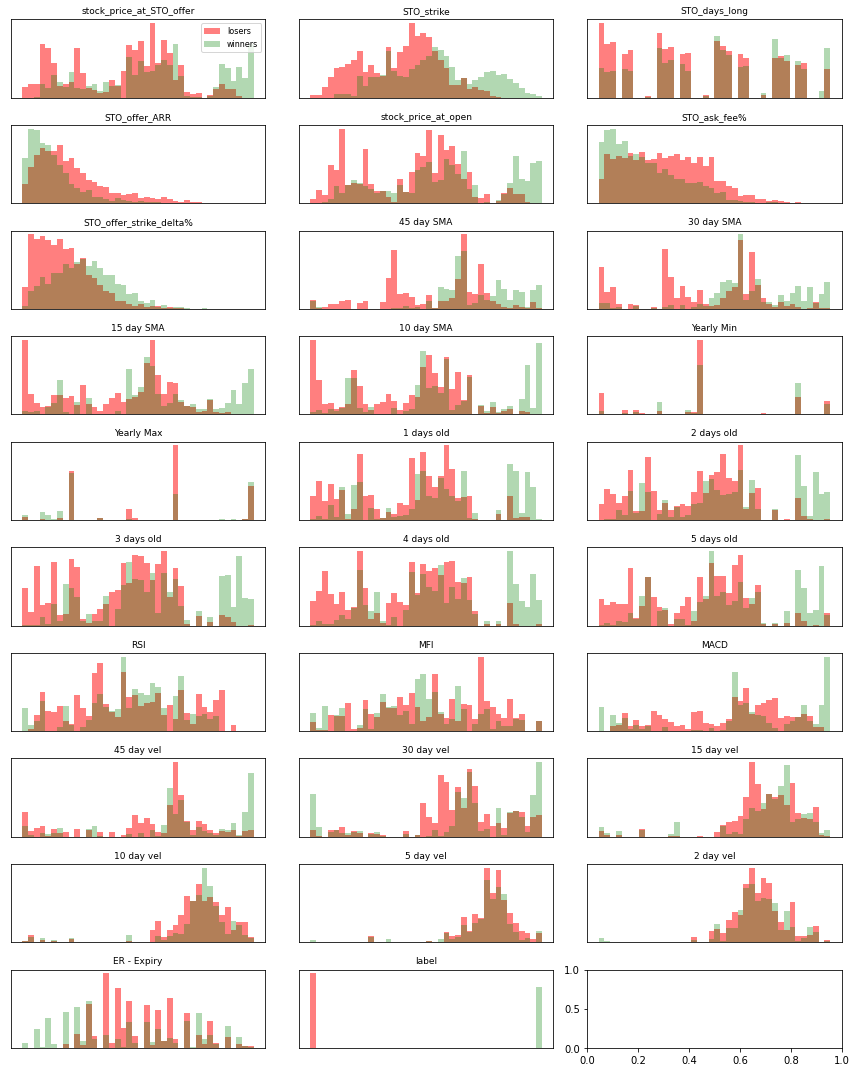

In [2]:
import matplotlib
import matplotlib.pyplot as plt

opt_sample = pd.read_csv('opt_sample.csv', index_col = 0)
print(opt_sample.shape)
#print(opt_sample.head(5))
fig,axes =plt.subplots(10,3, figsize=(12, 15)) # 3 columns each containing 9 figures, total 27 features
winners = opt_sample[opt_sample['label']==1]    # define winners
losers  = opt_sample[opt_sample['label']==0]    # define losers

winners = winners.to_numpy()
losers  = losers.to_numpy()
opt_np = opt_sample.to_numpy()

ax=axes.ravel()# flat axes with numpy ravel

print('setting up bins.') 
for i in range(len(opt_sample.columns.values)):
  _,bins=np.histogram(opt_np[:,i],bins=40)
  
  ax[i].hist(losers[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(winners[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region
  ax[i].set_title(opt_sample.columns.values[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['losers','winners'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()


Each chart above shows a collection of green bars and red bars for a single feature. 

Evaluation Questions:
 - What is the meaning of the green bars and red bars?
 - By looking at the charts, can you identify which features contain more information to train the Learners? How? Why?
 - Which chart shows perfect separation between the red and green bars. Why?
 - Can we use this feature to train the Learners? Why, why not?
 - In your opinion, can we train the Learners effectively with this set of features? Why, why not? 
 
 Code Questions:
 - Develop a single metric that defines the relationship between red and greed data points for each feature.
 - Compare your metric to the charts. Does your metric provide additional insight? Why, why not.
 - Calculate the correlation matrix of all the features. Hint, this is a single line of code with a dataframe.
 - Rank the features with the highest correlation, then plot the correlation as a series of charts. Any benefit?
 - Rank the correlation of each feature with the label, then plot. Any additional insights?
 
The correlation analysis is one method to perform feature reduction or elimination, which is a key component in feature development. The next notebook in this series shows several techniques to do feature elimination.

## 3.0 Metrics for Evaluating Learners


Let's take a brief detour here to review evaluation metrics for classifiers. With a label of only two values (T, F), this project is a binary classifier. The Confusion Matrix shown below captures all the variables needed to measure performance. 

| Actual Result | Predicted Result = True | Predicted Result = False |
| --- | --- | --- |
| True | True Positive (TP) | False Negative (FN) |
| False | False Positive (FP)| True Negative (TN) |


1. Accuracy is a simple count of total correct predictions / total predictions. Thus accuracy is not sensitive to the ratio of true/false labels. As the imbalance moves to larger ratios then accuracy gives correspondlingly less weight to errors in predictions of the less frequent label. In extreme cases such as some medical analysis (e.g., cancer diagnosis) or financial transactions (e.g., credit card fraud), which have ratios of 1000:1 or higher, accuracy is almost uselesss because the goal is to find the extremely rare occurrences.

2. Precision and Recall both ignore true negative predictions (TN). As a result, they are asymmetric. If the data set is run with the true / false labels switched, precision and recall will produce reciprical values. 

3. F1 score is the weighted average of precision and recall scores. As a result, it has the same flaw regarding true negative predictions.  

4. Matthews Correlation Coefficient (MCC) is a balanced metrix that uses all four values in the confusion matrix. MCC has a range or +-1.0 with 1 being a perfect score, indicating no FP and no FN. A score of 0 indicates  no correlation and a score of -1 indicates perfect reversse correlation.

For this project, these four metrics are probably sufficient to evaluate the Learners. Consider especially MCC in your personal evaluations. 

For other projects you may consider other metrics. See this article for a thorough discussion of metrics for binary classifiers: https://towardsdatascience.com/the-ultimate-guide-to-binary-classification-metrics-c25c3627dd0a


## 3.1 Train and Test Learners. 

Review the function to train, test, and measure different Learners. Review the online documentation for the SKLearn library and read about each of these Learners.

Evaluation Questions:
 - What is a regressor? a classifier? Which should we use for this project as set up? Why?
 - How would we change the setup to use the other type? Which would be better? Why?
 - Describe each Learner in your own words. Which ones do you think will work best for this project? Why?
 - In this project the Learner chooses option trades to execute. What is the likely financial result of a false positive? Why?
 - What is the likely financial result of a false negative? Why?
 - How do the different impacts of false positive and false negative errors impact your evaluation of the Learners?
 
Code Questions:
 - When you execute the code block below, what output do you expect to see? Why? This is a trick question.
 - How will you add another Learner to the evaluation set?

In [3]:
# Import ML Libraries from SKLearn.

import lightgbm
from lightgbm import LGBMClassifier as LGBMC

from sklearn import svm
from sklearn import metrics

from sklearn.decomposition     import PCA
from sklearn.preprocessing     import StandardScaler
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.neural_network    import MLPClassifier
from sklearn.ensemble          import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets          import make_classification
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.neural_network    import MLPClassifier
from sklearn.naive_bayes       import GaussianNB 
from sklearn.feature_selection import SelectKBest
import xgboost
from xgboost                   import XGBClassifier
import catboost
from catboost                  import CatBoostClassifier
from sklearn.feature_selection import chi2

import time
import random

def RunLearners(Xr_train, Xr_test, yr_train, yr_test, all_run_stats, stats_columns, run_ID):
    print() 
    print('Please be patient. Some of these Learners are pretty slow learners.')
    print('If you get impatient, put in a print statement to show progress, or just use one already in place.')
    print()
    
    learners = {'SVC sigmoid'      : svm.SVC(kernel = 'sigmoid'),
                #'SVC linear'       : svm.SVC(kernel = 'linear'),
                #'SVC poly'         : svm.SVC(kernel = 'poly'),
                'GaussianNB'       : GaussianNB(),
                'AdaBoost'         : AdaBoostClassifier(),
                #'RandomForest_d6'  : RandomForestClassifier(max_depth=3, random_state=97),
                #'KNNeighbors_2'    : KNeighborsClassifier(n_neighbors=3),
                'KNNeighbors_8'    : KNeighborsClassifier(n_neighbors=8),
                'MLPerceptron'     : MLPClassifier(alpha=1, max_iter=1000),
                'GradientBoost'    : GradientBoostingClassifier(),
                'RandomForest_d12' : RandomForestClassifier(max_depth=12, random_state=97),
                'XGBoost'          : XGBClassifier(),
                'CatBoost'         : CatBoostClassifier(verbose = False, iterations = 300),
                'LightGBoost'      : LGBMC()
               }
    
    learner_types = learners.keys()
    for learner in learner_types: 
        print(learner ,'is learning now.')   
        clf = learners[learner]
        start_time = time.time()  
        clf.fit(Xr_train, yr_train)
        
        end_time = time.time()
        train_time = end_time - start_time
        start_time = time.time()  
        yr_pred = clf.predict(X_test)
        end_time = time.time()
        predict_time = end_time - start_time
        
        #Performance Metrics
        accuracy       = metrics.accuracy_score(yr_test, yr_pred)
        precision      = metrics.average_precision_score(yr_test, yr_pred)
        recall         = metrics.recall_score(yr_test, yr_pred, labels=None, pos_label=1, 
                                         average='binary', sample_weight=None, zero_division='warn')
        F1_score       = metrics.f1_score(yr_test, yr_pred, labels=None, pos_label=1, average='binary', 
                                     sample_weight=None, zero_division='warn')
        tn, fp, fn, tp = metrics.confusion_matrix(yr_test, yr_pred, labels=None, sample_weight=None, normalize=None).ravel()
        mcc            = metrics.matthews_corrcoef(yr_test, yr_pred, sample_weight=None)
        
        learner_metrics_dict = {'Learner'  : [learner],
                                'Accuracy' : [accuracy],
                                'Precision': [precision], 
                                'Recall'   : [recall],
                                'MCC'      : [mcc],
                                'True Neg' : [tn],
                                'False Pos': [fp], 
                                'False Neg': [fn], 
                                'True Pos' : [tp],
                                'Train Time': [train_time],
                                'Predict Time': [predict_time], 
                                'Run_ID'      : [run_ID]
                               }
                
        this_run_stats = pd.DataFrame(data = learner_metrics_dict)         
        all_run_stats = all_run_stats.append(this_run_stats)
    return all_run_stats

print()
print('No output yet. Call this function with a set of train and test features.')
print('First run the code block below to prepare a set of train and test data.')



No output yet. Call this function with a set of train and test features.
First run the code block below to prepare a set of train and test data.


## 4. Investigate the train and test data sets.
Run the code block below, then consider these questions.

Evaluation Questions:
- Explain the differences between X_train, y_train, X_test, and y_test. 
- What are the dimensions of each?
- What is the purpose of each?
- What is the difference between a numpy array and a dataframe? Which works with a Learner?
- How does the code modify X_train? Why?

In [4]:
# Prepare the test and train data sets.

X_train = pd.DataFrame()
y_train = pd.DataFrame()
X_test  = pd.DataFrame()
y_test  = pd.DataFrame()

stats_columns = ['Learner', 'Accuracy', 'Precision', 'Recall', 'MCC',
                 'True Neg', 'False Pos', 'False Neg', 'True Pos', 'Train Time', 'Predict Time', 'Run_ID']

learner_stats = pd.DataFrame(columns = stats_columns)

X_train  = pd.read_csv('opt_sample.csv', index_col = 0)

y_train = X_train[['label']].to_numpy()
y_train = y_train.ravel()
print('y_train shape = ', y_train.shape)
X_train.drop(labels = 'label', axis = 'columns', inplace = True)
print('X_train shape = ', X_train.shape)

X_test = pd.read_csv('opt_test.csv', index_col = 0)
y_test = X_test[['label']].to_numpy()
X_test.drop(labels = 'label', axis = 'columns', inplace = True)

y_train = np.ravel(y_train)
y_test  = np.ravel(y_test)

run_ID = 'Initial'

learner_stats = RunLearners(X_train, X_test, y_train, y_test, learner_stats, stats_columns, run_ID)
learner_stats['sample count'] = learner_stats['True Neg']  + learner_stats['True Pos'] + \
                                learner_stats['False Neg'] + learner_stats['False Pos']
print(learner_stats)
learner_stats.to_csv('learner_stats.csv')

y_train shape =  (5577,)
X_train shape =  (5577, 28)

Please be patient. Some of these Learners are pretty slow learners.
If you get impatient, put in a print statement to show progress, or just use one already in place.

SVC sigmoid is learning now.
GaussianNB is learning now.
AdaBoost is learning now.
KNNeighbors_8 is learning now.
MLPerceptron is learning now.
GradientBoost is learning now.
RandomForest_d12 is learning now.
XGBoost is learning now.
CatBoost is learning now.
LightGBoost is learning now.
            Learner  Accuracy  Precision    Recall       MCC True Neg  \
0       SVC sigmoid  0.462389   0.434995  0.295758 -0.106436      592   
0        GaussianNB  0.694690   0.595571  0.658182  0.383996      713   
0          AdaBoost  0.892699   0.834792  0.872727  0.783534      894   
0     KNNeighbors_8  0.923119   0.881792  0.900606  0.845007      926   
0      MLPerceptron  0.802544   0.746534  0.614545  0.623660      944   
0     GradientBoost  0.961283   0.938148  0.952727 

## 6. Plot and Compare Performance of the Learners.



<AxesSubplot:>

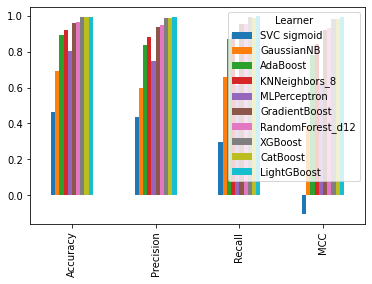

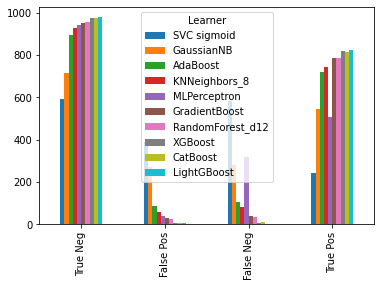

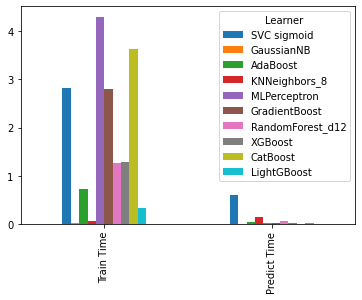

In [5]:

stats_for_plot = learner_stats.set_index('Learner', inplace=False, verify_integrity=False)
stats_xp = stats_for_plot.transpose(copy = True)
drop_rows = ['True Neg', 'False Pos', 'False Neg', 'True Pos', 'Train Time', 'Predict Time', 'Run_ID', 'sample count']
metrics = stats_xp.drop(labels = drop_rows, axis = 0, inplace = False)
metrics.plot.bar()

drop_rows = ['Accuracy', 'Precision', 'Recall', 'MCC','Train Time', 'Predict Time', 'Run_ID', 'sample count']
confusion = stats_xp.drop(labels = drop_rows, axis = 0, inplace = False)
confusion.plot.bar()

drop_rows = ['Accuracy', 'Precision', 'Recall', 'MCC', 'True Neg', 'False Pos', 'False Neg', \
             'True Pos', 'Run_ID', 'sample count']
speed = stats_xp.drop(labels = drop_rows, axis = 0, inplace = False)
speed.plot.bar()



# Performance Evaluation - Top Chart

Refer to the performance chart to answer these questions. You can also refer to the numerice values for each metric, shown in the print of learner_stats df.

Evaluation Questions. You may need to modify function RunLearners and run it a few times with different learners to answer these evaluation questions. Note some other learners are already set up, just commented out.

 - What is the definition of each performance metric? 
 - Which Learner performed best overall on the metrics?
 - Comparing RandomForest Learners, what do the suffixes mean?
 - Which RandomForest did better? Why?
 - What problems would you expect to see if we continued increasing the d parameter?
 - How can you find the best value for the d parameter?
 - Do the same comparison and analysis for the KNNeighbors numeric suffix. 
    You will need to modify the code to run at least two KNN Learners. 
 - Which Learners consistently underperformed? In your opinion, why?
 - What does AdaBoost boost? XGBoost? CatBoost? What is boosting, anyway?
 - How could you improve performance of AdaBoost? XGBoost? CatBoost?
    You may need to read the docs for each of these Learners to understand how to set the parameters to improve the results.
 - Based on the performance of the Learners, would you consider this learning challenge to be linear, nonlinear, or other? 
    Why, or not?
    
For this data set the Boosters outperformed all the other Learners, although RF_d12 and KNN_8 showed surprisingly well.
- Why did the Boosters show such dominance over other Learners?
- What makes this data set so suitable for Boosters? 
- Would Boosters still dominate with much larger data sets, say 500 K or 5 M samples?
- For this data set, can you identify a clear winner and loser among the Boosters? 
- How would you change the data set to highlight the differences between the Boosters?

Code Questions:
 - Change the parameters KNNeighbor and RandomForest. Explain the results.
 - Change the parameters for AdaBoost, CatBoost, and XGBoost. Explain the results. 
 - Test another type of classifier. Predict the results for that classifier, then run it and compare to your prediction. 
 - Change the parameters for SVC and MLP. Can you improve their performance with different parameters?
 - Change the y axis of the plot to expand the performance differences of the Learners. Is that better, or just deceptive?


# Confusion Matrix - Middle Chart
The middle chart does not display any matrix, only the four values for each Learner. 

Evaluation Questions.
 -What is the impact of a false positive for this application? Why?
 -What is the impact of a false negative for this application? Why?
 -Describe an application where the impact of a false negative is much greater than a false positive. How, and why?
 -Would you consider this the data set for this application to be balanced or not? Why? 

Code Questions
- Display the confusion matrix valued in a matrix form. Does the display change or improve your understanding? How?
- Try using normalized values for the confusion matrix. Does this help your understanding? How, or not?
- How would you compare confusion matrix performance across two Learners? across many Learners?


# Execution Times - Bottom Chart

Evaluation Questions. You may need to modify function RunLearners and run it a few times with different learners selected to answer these Evaluation Questions. 
- Why does CatBoost take so long to train?
- Why does KNNeighbors train so quickly?
- Why does RandomForest train time increase as the d parameter increases?
- Why is prediction time so much faster than train time for all Learners except KN Neighbors?
- Why is KN Neighbors slower on prediction time?
- Which is more important - train time or prediction time? Why? What circumstances?
- What circumstances or requirements might change the relative importance of train time vs. prediciton time?
- Given the execution times above, can you predict how train time will change as the training data set increases? Why?

Code Questions:
- In the chart, execution times are not effectively displayed. Change the chart to improve their display.
- Which data sets are used for training?
- Make those data sets 50% smaller, then 90% smaller, then rerun the Learners and plot the results.
- How do the results change with the smaller data sets? Why?

## Congratulations, You trained and compared several Learners.

Congratulations! You just trained several Learners to pick winning stock option trades. Now, you are almost ready to make a fortune in the stock market. But, first... consider these questions:

- How can you improve the feature set? 
- Which Learner(s) would you choose? Why?
- How can you gain more confidence in your trader?
- What is your goal? Single profitable trades, or a portfolio of trades? What's the difference?

Tune into the next exciting notebook to explore questions of maximizing portfolio results for options trading. 

Wishing you only profitable trades and good learning,

Richard Barrett

richard at rbshomes dot com.

P.S. I want to hear about your adventures in Machine Learning, your questions and comments about stock option trading, and especially your specific applications for machine learning. Just shoot me an email.
